# Stanford 40
### Download the data
You can see the zip files if you click the Files tab (looks like a folder symbol on the left of the screen)

### Unzip it

## Read the train and test splits, combine them and make better splits to help training networks easier.

In [3]:
from collections import Counter
from sklearn.model_selection import train_test_split

keep_stanford40 = ["applauding", "climbing", "drinking", "jumping", "pouring_liquid", "riding_a_bike", "riding_a_horse", 
        "running", "shooting_an_arrow", "smoking", "throwing_frisby", "waving_hands"]
with open('Stanford40/ImageSplits/train.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    train_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]

with open('Stanford40/ImageSplits/test.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    test_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]

# Combine the splits and split for keeping more images in the training set than the test set.
all_files = train_files + test_files
all_labels = train_labels + test_labels
train_files, test_files = train_test_split(all_files, test_size=0.1,random_state=0, stratify=all_labels)
train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]
test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (2733):
	['drinking_203.jpg', 'smoking_048.jpg', 'running_099.jpg', 'jumping_186.jpg', 'smoking_205.jpg', 'riding_a_bike_090.jpg', 'climbing_184.jpg', 'throwing_frisby_078.jpg', 'applauding_185.jpg', 'throwing_frisby_131.jpg', 'running_241.jpg', 'riding_a_horse_229.jpg', 'throwing_frisby_009.jpg', 'climbing_126.jpg', 'waving_hands_188.jpg', 'shooting_an_arrow_062.jpg', 'riding_a_horse_191.jpg', 'applauding_087.jpg', 'applauding_074.jpg', 'riding_a_bike_181.jpg', 'running_091.jpg', 'riding_a_bike_188.jpg', 'riding_a_bike_027.jpg', 'throwing_frisby_035.jpg', 'climbing_022.jpg', 'applauding_095.jpg', 'waving_hands_024.jpg', 'running_225.jpg', 'climbing_224.jpg', 'riding_a_bike_108.jpg', 'running_050.jpg', 'jumping_089.jpg', 'pouring_liquid_089.jpg', 'climbing_087.jpg', 'applauding_143.jpg', 'jumping_069.jpg', 'waving_hands_039.jpg', 'smoking_019.jpg', 'drinking_030.jpg', 'running_189.jpg', 'climbing_159.jpg', 'climbing_221.jpg', 'drinking_162.jpg', 'drinking_210.jpg', 'riding_

## Make an aditional training and validation split on the Stanford40 set.


In [4]:
train_files, validation_files, train_labels, validation_labels = train_test_split(train_files, train_labels, test_size=0.1,random_state=0, stratify=train_labels)
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Validation files ({len(validation_files)}):\n\t{validation_files}')
print(f'Validation labels ({len(validation_labels)}):\n\t{validation_labels}\n'\
      f'Validation Distribution:{list(Counter(sorted(validation_labels)).items())}\n')

Train files (2459):
	['riding_a_bike_140.jpg', 'running_196.jpg', 'jumping_005.jpg', 'riding_a_bike_282.jpg', 'climbing_130.jpg', 'running_168.jpg', 'waving_hands_168.jpg', 'riding_a_horse_161.jpg', 'climbing_048.jpg', 'pouring_liquid_053.jpg', 'riding_a_bike_292.jpg', 'running_039.jpg', 'drinking_220.jpg', 'drinking_005.jpg', 'smoking_030.jpg', 'riding_a_bike_286.jpg', 'drinking_025.jpg', 'applauding_215.jpg', 'smoking_117.jpg', 'waving_hands_196.jpg', 'applauding_140.jpg', 'riding_a_horse_292.jpg', 'throwing_frisby_013.jpg', 'smoking_172.jpg', 'applauding_005.jpg', 'climbing_210.jpg', 'pouring_liquid_104.jpg', 'riding_a_bike_128.jpg', 'waving_hands_041.jpg', 'riding_a_bike_083.jpg', 'shooting_an_arrow_048.jpg', 'drinking_034.jpg', 'drinking_223.jpg', 'drinking_100.jpg', 'running_188.jpg', 'pouring_liquid_031.jpg', 'smoking_184.jpg', 'jumping_225.jpg', 'jumping_272.jpg', 'riding_a_horse_069.jpg', 'jumping_273.jpg', 'smoking_178.jpg', 'climbing_253.jpg', 'jumping_185.jpg', 'pouring_liq

## Transforming string labels to Index labels of the classname list.

In [5]:
from sklearn.preprocessing import LabelEncoder
# fit the label encoder:
le_stanford = LabelEncoder()
le_stanford.fit(keep_stanford40)

# convert string labels to indexes for all labels:
train_labels = le_stanford.transform(train_labels)
validation_labels = le_stanford.transform(validation_labels)
test_labels = le_stanford.transform(test_labels)


# print the resulting index labels
#print(train_labels)
#print(validation_labels)
#print(test_labels)

### Visualize a photo from the training files and also print its label

An image with the label - 1


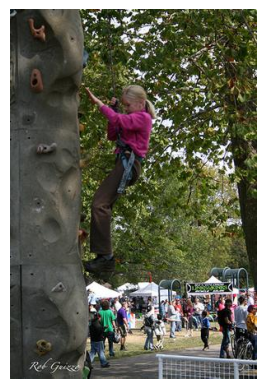

In [6]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

image_no = 4  # change this to a number between [0, 1200] and you can see a different training image
img = cv2.imread(f'Stanford40/JPEGImages/{train_files[image_no]}')
print(f'An image with the label - {train_labels[image_no]}')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Turning the list of image names into a numpy array of images.

In [7]:
import tensorflow as tf
import cv2 as cv
import numpy as np
def loadAndPreprocessImgs(filenames):
    images = []
    for f in filenames:
        path = f'Stanford40/JPEGImages/{f}'
        img = cv.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_resized = tf.keras.preprocessing.image.smart_resize(img, [112,112])
        image_normalized = image_resized / 255
        images.append(image_normalized)
        
    return np.float32(images)

In [33]:
stanford_train_files = loadAndPreprocessImgs(train_files)
stanford_validation_files = loadAndPreprocessImgs(validation_files)
stanford_test_files = loadAndPreprocessImgs(test_files)

### Task 1: A CNN for the Stanford 40 dataset.

In [229]:
##Import the libraries
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Conv2D, MaxPooling2D, Flatten, Dropout

## Creating the layers
input_layer = Input(shape=(112,112,3))

Conv2D_1 = Conv2D(filters = 12, kernel_size = 3, padding = 'same', activation = 'relu')(input_layer)
MaxPool_1 = MaxPooling2D()(Conv2D_1)

Dropout_1 = Dropout(0.3)(MaxPool_1)

Conv2D_2 = Conv2D(filters = 24, kernel_size = 3, padding = 'same', activation = 'relu')(Dropout_1)
MaxPool_2 = MaxPooling2D()(Conv2D_2)

Dropout_2 = Dropout(0.5)(MaxPool_2)

Conv2D_3 = Conv2D(filters = 48, kernel_size = 3, padding = 'same', activation = 'relu')(Dropout_2)
MaxPool_3 = MaxPooling2D()(Conv2D_3)

Dropout_3 = Dropout(0.3)(MaxPool_3)

Conv2D_10 = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(Dropout_3)
MaxPool_4 = MaxPooling2D()(Conv2D_10)

Dropout_4 = Dropout(0.5)(MaxPool_4)

Flatten_1 = Flatten()(Dropout_4)

Dense_1 = Dense(50, activation="relu")(Flatten_1)

output_layer= Dense(12, activation=tf.keras.activations.softmax)(Dense_1)

##Defining the model by specifying the input and output layers
stanford40_model = Model(inputs=input_layer, outputs=output_layer)

stanford40_model.summary()

#plot a grapical scheme of the network
plot_model(stanford40_model, to_file=f'Stanford40 Model/Network_Graph.png', show_shapes=True, show_layer_names=True, show_layer_activations = True)

## defining the optimiser and loss function
stanford40_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_48 (InputLayer)       [(None, 112, 112, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 12)      336       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 12)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 56, 56, 12)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 24)        2616      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 24)       0         
 2D)                                                      

In [35]:
## training the model
_epochs = 40

history = stanford40_model.fit(stanford_train_files, train_labels, epochs=_epochs,batch_size= 32, validation_data = (stanford_validation_files, validation_labels))
stanford40_model.save_weights('Stanford40 Model/newWeights.h5')

Epoch 1/40
77/77 [==============================] - 1s 10ms/step - loss: 2.4885 - accuracy: 0.0943 - val_loss: 2.4799 - val_accuracy: 0.1022
Epoch 2/40
77/77 [==============================] - 1s 8ms/step - loss: 2.4686 - accuracy: 0.1163 - val_loss: 2.4803 - val_accuracy: 0.1277
Epoch 3/40
77/77 [==============================] - 1s 9ms/step - loss: 2.4590 - accuracy: 0.1228 - val_loss: 2.4753 - val_accuracy: 0.1460
Epoch 4/40
77/77 [==============================] - 1s 8ms/step - loss: 2.4389 - accuracy: 0.1391 - val_loss: 2.4533 - val_accuracy: 0.1861
Epoch 5/40
77/77 [==============================] - 1s 8ms/step - loss: 2.3758 - accuracy: 0.1651 - val_loss: 2.3963 - val_accuracy: 0.1934
Epoch 6/40
77/77 [==============================] - 1s 7ms/step - loss: 2.2690 - accuracy: 0.2143 - val_loss: 2.3291 - val_accuracy: 0.2117
Epoch 7/40
77/77 [==============================] - 1s 8ms/step - loss: 2.1887 - accuracy: 0.2456 - val_loss: 2.2476 - val_accuracy: 0.2226
Epoch 8/40
77/77 [=

* visualization of the training:


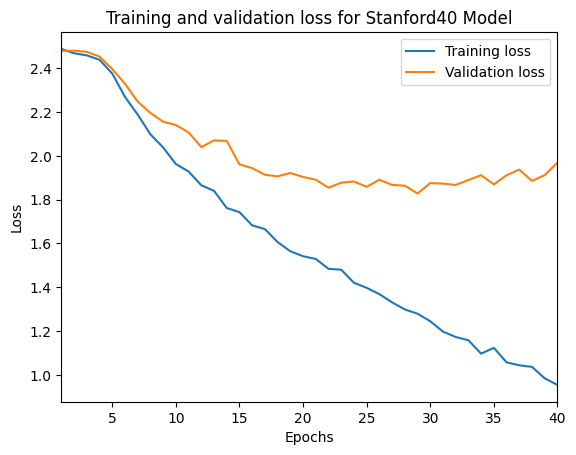

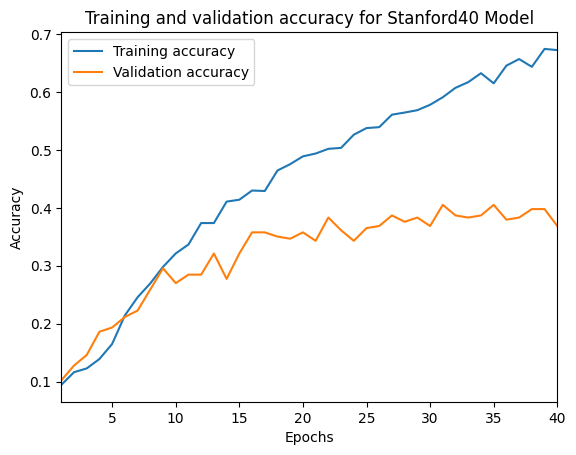

In [36]:
import visualizationPlotting as visplot
visplot.plotPerformance(history, 'Stanford40 Model', _epochs)

* test performance.

In [37]:
stanford40_model.load_weights('Stanford40 Model/Stanford40Weights.h5')

In [38]:
stanford40_model.evaluate(stanford_test_files,test_labels)

10/10 [==============================] - 0s 3ms/step - loss: 1.9417 - accuracy: 0.4145


[1.9417295455932617, 0.41447368264198303]

# Human Motion Database 51 (HMDB51)
### Download the dataset

### Split HMD into train and test

In [7]:
import os
import glob

keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse", 
        "run", "shoot_bow", "smoke", "throw", "wave"]

TRAIN_TAG, TEST_TAG = 1, 2
h_train_files, h_test_files = [], []
h_train_labels, h_test_labels = [], []
split_pattern_name = f"*test_split1.txt"
split_pattern_path = os.path.join('test_train_splits', split_pattern_name)
annotation_paths = glob.glob(split_pattern_path)
for filepath in annotation_paths:
    class_name = '_'.join(filepath.split('\\')[-1].split('_')[:-2])
    if class_name not in keep_hmdb51:
        continue  # skipping the classes that we won't use.
    with open(filepath) as fid:
        lines = fid.readlines()
    for line in lines:
        video_filename, tag_string = line.split()
        tag = int(tag_string)
        if tag == TRAIN_TAG:
            h_train_files.append(video_filename)
            h_train_labels.append(class_name)
        elif tag == TEST_TAG:
            h_test_files.append(video_filename)
            h_test_labels.append(class_name)

print(f'Train files ({len(h_train_files)}):\n\t{h_train_files}')
print(f'Train labels ({len(h_train_labels)}):\n\t{h_train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(h_train_labels)).items())}\n')
print(f'Test files ({len(h_test_files)}):\n\t{h_test_files}')
print(f'Test labels ({len(h_test_labels)}):\n\t{h_test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(h_test_labels)).items())}\n')
action_categories = sorted(list(set(h_train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (840):
	['#20_Rhythm_clap_u_nm_np1_fr_goo_0.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_2.avi', '#20_Rhythm_clap_u_nm_np1_le_goo_3.avi', '#20_Rhythm_clap_u_nm_np1_le_goo_4.avi', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_0.avi', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_1.avi', 'Applauding_Abby_clap_u_nm_np1_fr_med_0.avi', 'Applauding_Abby_clap_u_nm_np1_fr_med_1.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2.avi', 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_0.avi', 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_1.avi', 'Boom__Snap__Clap!_(Challenge)_clap_u_nm_np1_fr_med_1.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_0.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_1.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_2.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_0.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_1.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_2.

### And additional split of the training data into a train and validation set


In [8]:
h_train_files, h_validation_files, h_train_labels, h_validation_labels = train_test_split(h_train_files, h_train_labels, test_size=0.1,random_state=0, stratify=h_train_labels)
print(f'Train files ({len(h_train_files)}):\n\t{h_train_files}')
print(f'Train labels ({len(h_train_labels)}):\n\t{h_train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(h_train_labels)).items())}\n')
print(f'Validation files ({len(h_validation_files)}):\n\t{h_validation_files}')
print(f'Validation labels ({len(h_validation_labels)}):\n\t{h_validation_labels}\n'\
      f'Validation Distribution:{list(Counter(sorted(h_validation_labels)).items())}\n')

Train files (756):
	['Documentario_Le_Parkour_Londrina_jump_f_nm_np1_ri_bad_2.avi', 'boom_snap_clap_(challenge)_HARDCORE_VERSION!_clap_u_nm_np1_fr_bad_1.avi', 'EVOLUTION_wave_u_nm_np1_le_med_3.avi', 'megan_roof_climbing_climb_f_cm_np1_ri_goo_0.avi', 'Maya_beim_Winken_wave_f_cm_np1_fr_med_0.avi', 'Become_a_Professional_Bartender_pour_u_cm_np1_fr_med_0.avi', 'TrumanShow_run_f_nm_np1_ba_med_19.avi', 'Tour_de_France_2003_-_Armstrong_attacks_Ullrich_after_Fall_ride_bike_f_cm_np2_fr_med_1.avi', 'Compilationknifethrowing_throw_u_nm_np1_ba_med_2.avi', 'NotAnotherTeenMovieslowclap_clap_u_cm_np5_fr_med_3.avi', 'Radfahren_um_die_Aggertalsperre_06_09_2009_ride_bike_f_cm_np2_ri_med_6.avi', 'MUSE_Wave_Goodbye_in_Wembley_wave_u_cm_np3_fr_med_1.avi', 'smoking_1_smoke_h_cm_np1_ri_med_1.avi', 'Veoh_Alpha_Dog_1_throw_u_nm_np1_ri_med_25.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi', 'slowclap_clap_u_nm_np1_fr_goo_0.avi', 'Mylifehorseriding_ride_horse_f_cm_np1_ri_med_1.avi', '#437_How_To_Ride_A_Bike_ride_b

In [234]:
def loadAndPreprocessVideoFrame(filenames, filelabels):
    images = []
    for f, l in zip(filenames, filelabels):
        vid = cv.VideoCapture(f'video_data/{l}/{f}')
        vid.set(cv.CAP_PROP_POS_FRAMES, cv.CAP_PROP_FRAME_COUNT / 2)
        _, img = vid.read()
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img_resized = tf.keras.preprocessing.image.smart_resize(img, [112,112])
        image_normalized = img_resized / 255
        images.append(image_normalized)
        
    return np.float32(images)



In [269]:
print("Screengrabbing training videos...")
hmdbFrames_training_files = loadAndPreprocessVideoFrame(h_train_files, h_train_labels)
print("Done!\nScreengrabbing validation videos...")
hmdbFrames_validation_files = loadAndPreprocessVideoFrame(h_validation_files, h_validation_labels)
print("Done!\nScreengrabbing test videos...")
hmdbFrames_test_files = loadAndPreprocessVideoFrame(h_test_files, h_test_labels)
print("Done!")

Screengrabbing training videos...
Done!
Screengrabbing validation videos...
Done!
Screengrabbing test videos...
Done!


## Transforming the string labels to index labels of the classname list.

In [270]:
from sklearn.preprocessing import LabelEncoder
# fit the label encoder:
le_hmdb51 = LabelEncoder()
le_hmdb51.fit(keep_hmdb51)

# convert string labels to indexes for all labels:
hi_train_labels = le_hmdb51.transform(h_train_labels)
hi_validation_labels = le_hmdb51.transform(h_validation_labels)
hi_test_labels = le_hmdb51.transform(h_test_labels)


# print the resulting index labels
#print(train_labels)
#print(validation_labels)
#print(test_labels)

## Finetuning our model using HMDB

### Task 2: Finetune model.

In [59]:
stanford40_model.trainable = True
print("Layers in base model: ", len(stanford40_model.layers))

# how many layers do we want to keep frozen?
finetune_start = 7
for layer in stanford40_model.layers[:finetune_start]:
    layer.trainable = False

## Recompile
stanford40_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
stanford40_model.load_weights('Stanford40 Model/newWeights.h5')

_epochs_finetune = _epochs

history_finetuned = stanford40_model.fit(hmdbFrames_training_files, hi_train_labels,
                              epochs=_epochs + _epochs_finetune,
                              batch_size= 64,
                              initial_epoch = history.epoch[-1],
                              validation_data = (hmdbFrames_validation_files, hi_validation_labels))
stanford40_model.save_weights('Stanford40 Model/finetunedWeights.h5')

Layers in base model:  16
Epoch 40/80
12/12 [==============================] - 1s 18ms/step - loss: 3.1168 - accuracy: 0.1614 - val_loss: 2.2989 - val_accuracy: 0.2500
Epoch 41/80
12/12 [==============================] - 0s 10ms/step - loss: 2.6084 - accuracy: 0.2050 - val_loss: 2.1676 - val_accuracy: 0.3095
Epoch 42/80
12/12 [==============================] - 0s 10ms/step - loss: 2.3567 - accuracy: 0.2474 - val_loss: 2.0840 - val_accuracy: 0.3214
Epoch 43/80
12/12 [==============================] - 0s 10ms/step - loss: 2.2024 - accuracy: 0.2646 - val_loss: 2.0468 - val_accuracy: 0.3333
Epoch 44/80
12/12 [==============================] - 0s 10ms/step - loss: 2.1119 - accuracy: 0.2937 - val_loss: 2.0130 - val_accuracy: 0.3452
Epoch 45/80
12/12 [==============================] - 0s 10ms/step - loss: 2.0522 - accuracy: 0.3214 - val_loss: 1.9894 - val_accuracy: 0.3690
Epoch 46/80
12/12 [==============================] - 0s 11ms/step - loss: 1.9789 - accuracy: 0.3479 - val_loss: 1.9605 - v

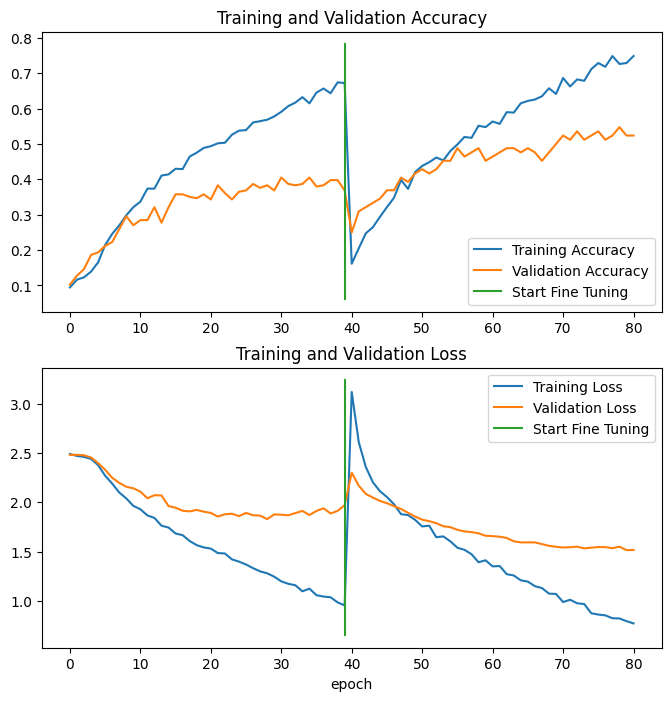

12/12 [==============================] - 0s 3ms/step - loss: 2.6181 - accuracy: 0.2361


[2.618081569671631, 0.2361111044883728]

In [60]:
acc = history.history['accuracy'] + history_finetuned.history['accuracy']
val_acc = history.history['val_accuracy'] + history_finetuned.history['val_accuracy']

loss = history.history['loss'] + history_finetuned.history['loss']
val_loss = history.history['val_loss'] + history_finetuned.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([_epochs-1,_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([_epochs-1,_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

stanford40_model.load_weights('Stanford40 Model/finetunedWeights.h5')
stanford40_model.evaluate(hmdbFrames_test_files, hi_test_labels)

In [271]:
stanford40_model.load_weights('Stanford40 Model/finetunedWeights.h5')
stanford40_model.evaluate(hmdbFrames_test_files, hi_test_labels)

12/12 [==============================] - 1s 52ms/step - loss: 2.6180 - accuracy: 0.2361


[2.61802077293396, 0.2361111044883728]

0.2361111044883728

## HMDB51 Model for opticalflow:

### Function for collecting the opticalflow frames from the videos.

In [185]:
def loadAndPreprocessVideoFlowFrames(filename, filelabel):
    """"
    Takes a filename and returns a np array with the 16 flow grids of the middle of the video
    """
    vid = cv.VideoCapture(f'video_data/{filelabel}/{filename}')
    flowFrames = []
    maxFrameNr = vid.get(cv.CAP_PROP_FRAME_COUNT)
    startFrameNr = (maxFrameNr - 17) / 2
    prevFrame = 0
    for i in range(17):
        vid.set(cv.CAP_PROP_POS_FRAMES, startFrameNr + i)
        _, currentframe = vid.read()
        currentframe = cv.cvtColor(currentframe, cv.COLOR_BGR2RGB)
        currentframe_resized = tf.keras.preprocessing.image.smart_resize(currentframe, [112,112])
        currentframe_normalized = cv.cvtColor(currentframe_resized, cv.COLOR_RGB2GRAY)
        if(isinstance(prevFrame, np.ndarray)):
            #calc opticalflow:
            flow = cv.calcOpticalFlowFarneback(prevFrame, currentframe_normalized, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            flowFrames.append(flow)
        prevFrame = currentframe_normalized

        
    return np.float32(flowFrames)

### Preproccessing the videos and saving the flowframes of each video:

In [188]:
import os
def saveFlowFrames(dataset,stringLabels,name):
    if not os.path.exists(f"HMDBFLOWS/{name}"):
        os.makedirs(f"HMDBFLOWS/{name}")
    for filename, stringLabel in zip(dataset,stringLabels):
        filenameMinExtention = filename.split('.')[0]
        flowFrames = loadAndPreprocessVideoFlowFrames(filename, stringLabel)
        np.save(f"HMDBFLOWS/{name}/{filenameMinExtention}",flowFrames)






In [189]:
saveFlowFrames(h_train_files, h_train_labels, 'train')
saveFlowFrames(h_validation_files, h_validation_labels, 'validation')
saveFlowFrames(h_test_files, h_test_labels, 'test')

#### Test if the flow images look right:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

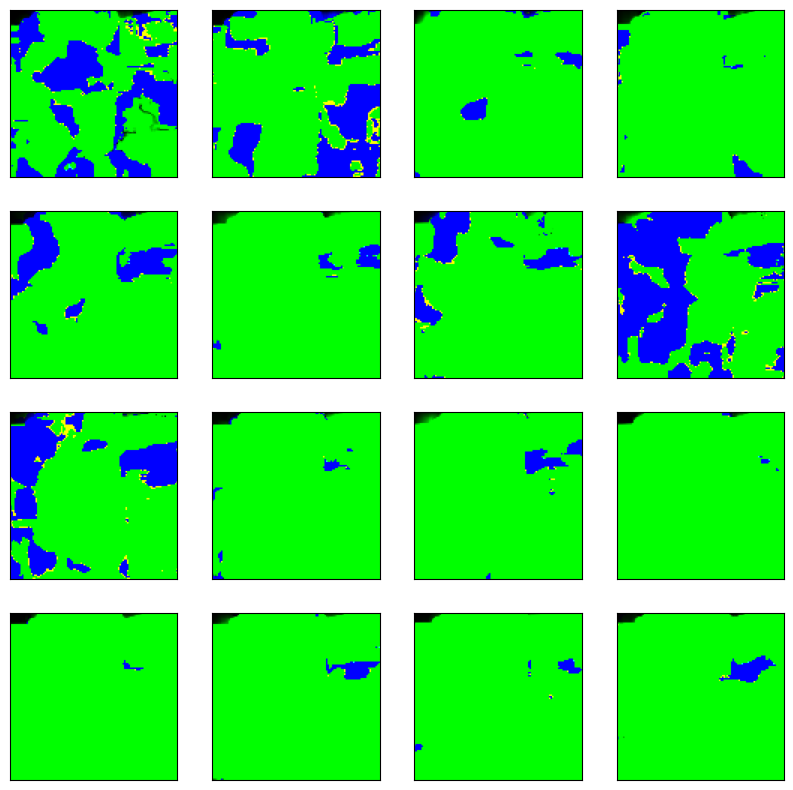

In [194]:
import numpy as np
import cv2 as cv
flowstacktest = np.load('HMDBFLOWS/train/megan_roof_climbing_climb_f_cm_np1_ri_goo_0.npy')
plt.figure(figsize=(10,10))
hsv = np.zeros((112,112,3),np.float32)
hsv[..., 1] = 255
for i in range(flowstacktest.shape[0]):
    flowframe = flowstacktest[i]
    mag, ang = cv.cartToPolar(flowframe[..., 0], flowframe[..., 1])
    hsv[..., 0] = ang*180/np.pi/2
    hsv[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
    bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(bgr)
plt.show()

### Datagenerator to reduce ram when training

In [195]:
from keras.utils import Sequence
class OpticalFlowDataGenerator(Sequence):
    """
    Needs to get string labels as input.
    """
    def __init__(self, dirPath, fileNames, stringLabels, batchSize, labelEncoder, shuffle = True):
        self.fileNames = fileNames
        self.batchSize = batchSize
        self.labels = stringLabels
        self.labelEncoder = labelEncoder
        self.dirPath = dirPath
        self.shuffle = shuffle
        self.indices = np.arange(len(self.fileNames))

    def __len__(self):
        return int(np.ceil(len(self.fileNames) / float(self.batchSize)))

    def __getitem__(self, idx):
        batchFilepaths = self.fileNames[idx * self.batchSize : (idx + 1) * self.batchSize]
        batchLabels = self.labels[idx * self.batchSize : (idx + 1) * self.batchSize]
        batchFlowSequences = []
        for filename, filelable in zip(batchFilepaths, batchLabels):
            filenameMinExtention = filename.split('.')[0]
            flowFrames = np.load(f'{self.dirPath}/{filenameMinExtention}.npy')
            batchFlowSequences.append(flowFrames)

        indexBatchLabels = self.labelEncoder.transform(batchLabels)
        

        return np.array(batchFlowSequences), np.array(indexBatchLabels)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)
            self.fileNames = np.array(self.fileNames)[self.indices]
            self.labels = np.array(self.labels)[self.indices]

In [196]:
hmdbFlow_training_generator = OpticalFlowDataGenerator('HMDBFLOWS/train', h_train_files, h_train_labels, 32, le_hmdb51)
hmdbFlow_validation_generator = OpticalFlowDataGenerator('HMDBFLOWS/validation', h_validation_files, h_validation_labels, 32, le_hmdb51)
hmdbFlow_test_generator = OpticalFlowDataGenerator('HMDBFLOWS/test', h_test_files, h_test_labels, 32, le_hmdb51)

### Task 3: A CNN for the Flowstacks of the HMDB dataset.

In [289]:
##Import the libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Conv3D, Conv2D, MaxPooling3D, Flatten, Dropout

## Creating the layers
input_layer = Input(shape=(16,112,112,2))

Conv3D_1 = Conv3D(filters = 6, kernel_size = 3, padding = 'same', activation = 'relu')(input_layer)
MaxPool_1 = MaxPooling3D()(Conv3D_1)

Dropout_1 = Dropout(0.3)(MaxPool_1)

Conv3D_2 = Conv3D(filters = 12, kernel_size = 3, padding = 'same', activation = 'relu')(Dropout_1)
MaxPool_2 = MaxPooling3D()(Conv3D_2)

Dropout_2 = Dropout(0.3)(MaxPool_2)

Conv3D_3 = Conv3D(filters = 24, kernel_size = 3, padding = 'same', activation = 'relu')(Dropout_2)
MaxPool_3 = MaxPooling3D()(Conv3D_3)

Dropout_3 = Dropout(0.3)(MaxPool_3)

Conv3D_4 = Conv3D(filters = 48, kernel_size = 3, padding = 'same', activation = 'relu')(Dropout_3)
MaxPool_4 = MaxPooling3D()(Conv3D_4)

Flatten_1 = Flatten()(MaxPool_4)

Dense_1 = Dense(20, activation="relu")(Flatten_1)
Dense_2 = Dense(50, activation="relu")(Dense_1)

output_layer= Dense(12, activation=tf.keras.activations.softmax)(Dense_2)

##Defining the model by specifying the input and output layers
hmdb_flow_model = Model(inputs=input_layer, outputs=output_layer)

hmdb_flow_model.summary()


## defining the optimiser and loss function
hmdb_flow_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Model: "model_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_51 (InputLayer)       [(None, 16, 112, 112, 2)  0         
                             ]                                   
                                                                 
 conv3d_198 (Conv3D)         (None, 16, 112, 112, 6)   330       
                                                                 
 max_pooling3d_183 (MaxPooli  (None, 8, 56, 56, 6)     0         
 ng3D)                                                           
                                                                 
 dropout_23 (Dropout)        (None, 8, 56, 56, 6)      0         
                                                                 
 conv3d_199 (Conv3D)         (None, 8, 56, 56, 12)     1956      
                                                                 
 max_pooling3d_184 (MaxPooli  (None, 4, 28, 28, 12)    0  

In [218]:
history_hmdb_flow = hmdb_flow_model.fit(hmdbFlow_training_generator,
                              epochs= 30,
                              batch_size= 32 ,
                              validation_data = hmdbFlow_validation_generator)
hmdb_flow_model.save_weights('HmdbFlow Model/flowModelWeights.h5')

Epoch 1/30
24/24 [==============================] - 19s 601ms/step - loss: 2.4825 - accuracy: 0.0794 - val_loss: 2.4615 - val_accuracy: 0.1310
Epoch 2/30
24/24 [==============================] - 14s 560ms/step - loss: 2.4126 - accuracy: 0.1190 - val_loss: 2.4462 - val_accuracy: 0.1310
Epoch 3/30
24/24 [==============================] - 14s 557ms/step - loss: 2.3786 - accuracy: 0.1614 - val_loss: 2.4216 - val_accuracy: 0.1190
Epoch 4/30
24/24 [==============================] - 14s 563ms/step - loss: 2.3184 - accuracy: 0.1720 - val_loss: 2.3720 - val_accuracy: 0.1429
Epoch 5/30
24/24 [==============================] - 14s 569ms/step - loss: 2.3157 - accuracy: 0.1759 - val_loss: 2.3701 - val_accuracy: 0.1905
Epoch 6/30
24/24 [==============================] - 17s 690ms/step - loss: 2.2791 - accuracy: 0.1958 - val_loss: 2.3804 - val_accuracy: 0.1667
Epoch 7/30
24/24 [==============================] - 15s 629ms/step - loss: 2.2675 - accuracy: 0.1892 - val_loss: 2.3782 - val_accuracy: 0.1548

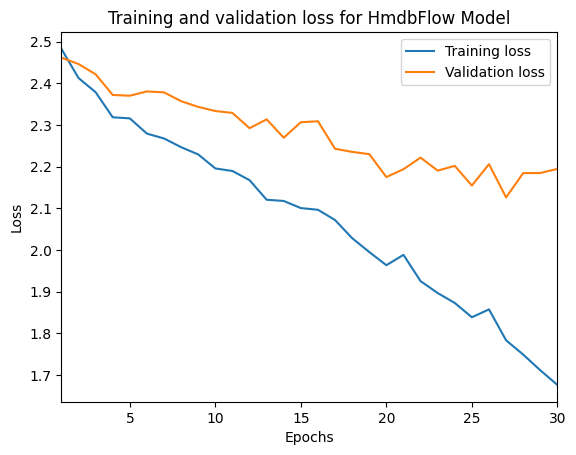

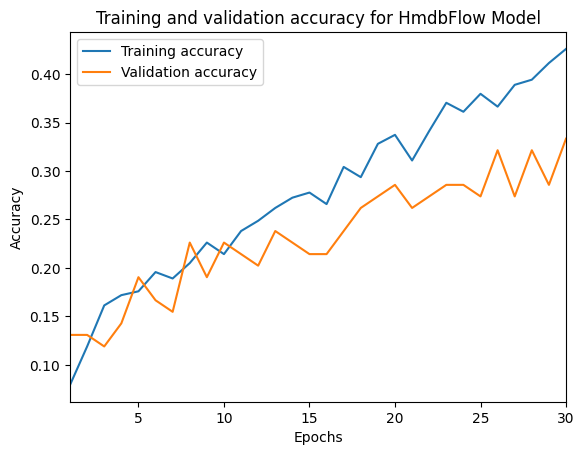

In [221]:
import visualizationPlotting as visplot
visplot.plotPerformance(history_hmdb_flow, 'HmdbFlow Model', 30)

In [275]:
hmdb_flow_model.load_weights('HmdbFlow Model/flowModelWeights30epochsrealgood.h5')
hmdb_flow_model.evaluate(hmdbFlow_test_generator)

12/12 [==============================] - 3s 235ms/step - loss: 2.4576 - accuracy: 0.2361


[2.4575579166412354, 0.2361111044883728]

## Task 4: Two-stream Network

In [295]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate, Dense

#load the best weights of both single models:
stanford40_model.load_weights('Stanford40 Model/finetunedWeights.h5')
hmdb_flow_model.load_weights('HmdbFlow Model/flowModelWeights30epochsrealgood.h5')

merged_output = Concatenate()([stanford40_model.layers[-2].output, hmdb_flow_model.layers[-2].output])
Dense_01 = Dense(50, activation="relu")(merged_output)
output_layer= Dense(12, activation=tf.keras.activations.softmax)(Dense_01)

hmdb_twostream_model = Model(inputs=[stanford40_model.input, hmdb_flow_model.input], outputs=merged_output)
hmdb_twostream_model.summary()
plot_model(hmdb_twostream_model, 'TwoStream Model/Network_Graph.png')

hmdb_twostream_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.000003), #small learningrate
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Model: "model_60"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_48 (InputLayer)          [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_51 (InputLayer)          [(None, 16, 112, 11  0           []                               
                                2, 2)]                                                            
                                                                                                  
 conv2d_4 (Conv2D)              (None, 112, 112, 12  336         ['input_48[0][0]']               
                                )                                                          

## New custom data generator to have both inputs

In [260]:
from keras.utils import Sequence
class TwoStreamDataGenerator(Sequence):
    """
    Needs to get string labels as input.
    """
    def __init__(self, dirPath, fileNames, stringLabels, batchSize, labelEncoder, shuffle = True):
        self.fileNames = fileNames
        self.batchSize = batchSize
        self.labels = stringLabels
        self.labelEncoder = labelEncoder
        self.dirPath = dirPath
        self.shuffle = shuffle
        self.indices = np.arange(len(self.fileNames))

    def __len__(self):
        return int(np.ceil(len(self.fileNames) / float(self.batchSize)))

    def __getitem__(self, idx):
        batchFilepaths = self.fileNames[idx * self.batchSize : (idx + 1) * self.batchSize]
        batchLabels = self.labels[idx * self.batchSize : (idx + 1) * self.batchSize]

        batchFlowSequences = []
        for filename, filelable in zip(batchFilepaths, batchLabels):
            filenameMinExtention = filename.split('.')[0]
            flowFrames = np.load(f'{self.dirPath}/{filenameMinExtention}.npy')
            batchFlowSequences.append(flowFrames)
        
        batchFrames = loadAndPreprocessVideoFrame(batchFilepaths, batchLabels)

        indexBatchLabels = self.labelEncoder.transform(batchLabels)
        

        return [batchFrames, np.array(batchFlowSequences)], np.array(indexBatchLabels)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)
            self.fileNames = np.array(self.fileNames)[self.indices]
            self.labels = np.array(self.labels)[self.indices]

## finetuning the network


In [261]:
hmdbTwoStream_training_generator = TwoStreamDataGenerator('HMDBFLOWS/train', h_train_files, h_train_labels, 32, le_hmdb51)
hmdbTwoStream_validation_generator = TwoStreamDataGenerator('HMDBFLOWS/validation', h_validation_files, h_validation_labels, 32, le_hmdb51)
hmdbTwoStream_test_generator = TwoStreamDataGenerator('HMDBFLOWS/test', h_test_files, h_test_labels, 32, le_hmdb51)

In [ ]:
history_hmdb_twostream = hmdb_twostream_model.fit(hmdbTwoStream_training_generator,
                              epochs= 2,
                              batch_size= 32 ,
                              validation_data = hmdbTwoStream_validation_generator)

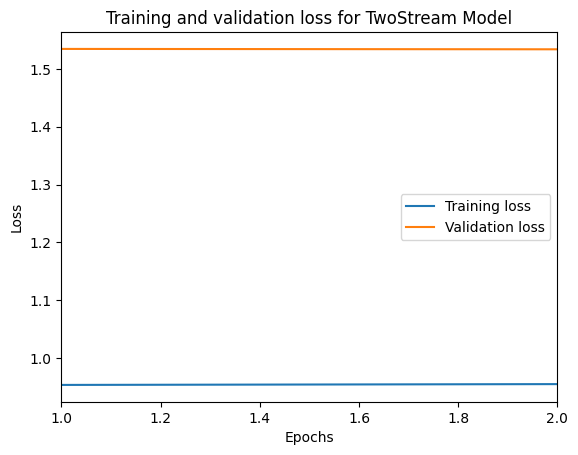

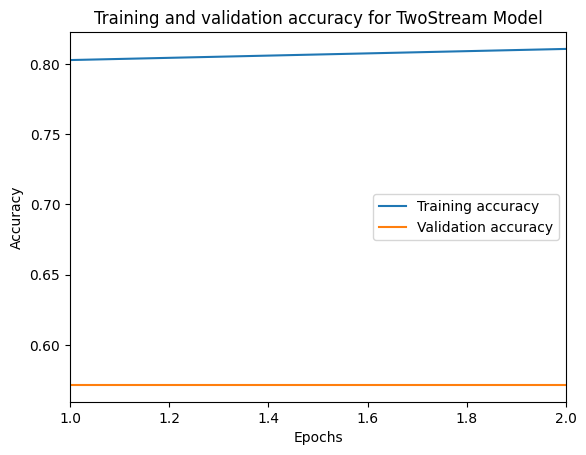

In [279]:
import visualizationPlotting as visplot
visplot.plotPerformance(history_hmdb_twostream, 'TwoStream Model', 2)

In [280]:
hmdb_twostream_model.evaluate(hmdbTwoStream_test_generator)

12/12 [==============================] - 13s 1s/step - loss: 2.1134 - accuracy: 0.2833


[2.113386631011963, 0.28333333134651184]